### About Dataset
Airlines Dataset Inspired in the regression dataset from Elena Ikonomovska. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.
You can find dataset at: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("airlines_delay.csv")

In [4]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


Fix NaN values if any

In [5]:
df[df.isna().any(axis=1)]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class


In [6]:
airline_labels = ["Airline"]
df = pd.get_dummies(df, columns=airline_labels, drop_first=False)

In [7]:
airportfrom_labels = ["AirportFrom"]
df = pd.get_dummies(df, columns=airportfrom_labels, drop_first=False)

In [8]:
airportto_labels = ["AirportTo"]
df = pd.get_dummies(df, columns=airportto_labels, drop_first=False)

In [9]:
df

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,1264.0,560.0,115.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5209.0,827.0,74.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,607.0,715.0,65.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Columns: 609 entries, Flight to AirportTo_YUM
dtypes: float64(3), int64(2), uint8(604)
memory usage: 331.3 MB


Setup testing/training data for the linear model

In [11]:
df.columns

Index(['Flight', 'Time', 'Length', 'DayOfWeek', 'Class', 'Airline_9E',
       'Airline_AA', 'Airline_AS', 'Airline_B6', 'Airline_CO',
       ...
       'AirportTo_TXK', 'AirportTo_TYR', 'AirportTo_TYS', 'AirportTo_UTM',
       'AirportTo_VLD', 'AirportTo_VPS', 'AirportTo_WRG', 'AirportTo_XNA',
       'AirportTo_YAK', 'AirportTo_YUM'],
      dtype='object', length=609)

In [12]:
x = df.drop(["Flight", "Class"], axis=1)
y = df["Class"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

Training the data

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_test, y_test)

LinearRegression()

In [16]:
print(lm.coef_)

[ 2.68666539e-04  4.14535380e-04 -7.02826696e-03  2.16998276e+08
  2.16998276e+08  2.16998276e+08  2.16998276e+08  2.16998276e+08
  2.16998276e+08  2.16998276e+08  2.16998276e+08  2.16998276e+08
  2.16998276e+08  2.16998276e+08  2.16998276e+08  2.16998276e+08
  2.16998276e+08  2.16998276e+08  2.16998276e+08  2.16998276e+08
  2.16998276e+08  1.58722139e+07  1.58722139e+07  1.58722139e+07
  1.58722137e+07  1.58722137e+07  1.58722140e+07  1.58722141e+07
  1.58722140e+07  1.58722141e+07  1.58722140e+07  1.58722139e+07
  1.58722139e+07  1.58722140e+07  1.58722140e+07  1.58722140e+07
  1.58722139e+07  1.58722140e+07  1.58722139e+07  1.58722139e+07
  1.58722140e+07  1.58722140e+07  1.58722140e+07  1.58722140e+07
  1.58722142e+07  1.58722140e+07  1.58722141e+07  1.58722143e+07
  1.58722140e+07  1.58722138e+07  1.58722140e+07  1.58722139e+07
  1.58722140e+07  1.58722140e+07  1.58722140e+07  1.58722140e+07
  1.58722140e+07  1.58722137e+07  1.58722139e+07  1.58722138e+07
  1.58722142e+07  1.58722

In [18]:
coef_df = pd.DataFrame(lm.coef_, x.columns, columns=["Coefficient"])
coef_df.sort_values("Coefficient", ascending=False)

,Coefficient
Airline_WN,2.169983e+08
Airline_CO,2.169983e+08
Airline_B6,2.169983e+08
Airline_EV,2.169983e+08
Airline_OO,2.169983e+08
...,...
AirportTo_PAH,7.489754e+06
AirportTo_BGR,7.489754e+06
Length,4.145354e-04
Time,2.686665e-04


Predicting the testing data

Predicting the testing data

In [19]:
prediction = lm.predict(x_test)

<AxesSubplot: xlabel='Class'>

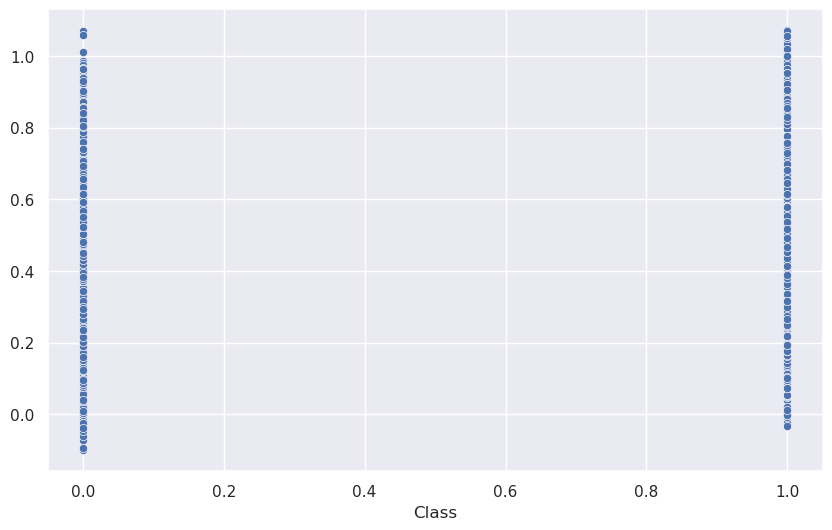

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=None, x=y_test, y=prediction)

In [21]:
print("MAE", metrics.mean_absolute_error(y_test, prediction))
print("MSE", metrics.mean_squared_error(y_test, prediction))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE 0.43704746856134863
MSE 0.21851181526614488
RMSE 0.46745247380471194


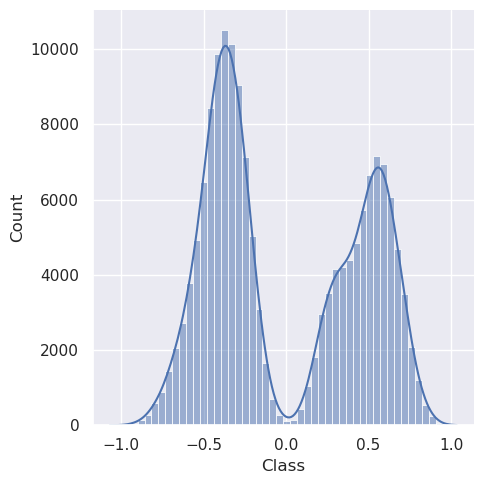

In [22]:
sns.displot(data=None, x=y_test - prediction, kde=True, bins=50)

In [23]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Time,2.686665e-04
Length,4.145354e-04
DayOfWeek,-7.028267e-03
Airline_9E,2.169983e+08
Airline_AA,2.169983e+08
...,...
AirportTo_VPS,7.489754e+06
AirportTo_WRG,7.489755e+06
AirportTo_XNA,7.489754e+06
AirportTo_YAK,7.489755e+06


### Logistic Regression

setup testing/training data for linear logistic regression

In [24]:
x = df.drop(["Flight", "Class"], axis=1)
y = df["Class"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [26]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
prediction = logmodel.predict(x_test)

Model Evalution

In [28]:
metrics.f1_score(y_test, prediction, average="weighted", labels=np.unique(prediction))

0.6324453930077699

In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71    119877
           1       0.63      0.47      0.54     95876

    accuracy                           0.64    215753
   macro avg       0.64      0.62      0.62    215753
weighted avg       0.64      0.64      0.63    215753



In [30]:
print(confusion_matrix(y_test, prediction))

[[93588 26289]
 [50919 44957]]
